### Task 0 Before your go

> 1. Rename Assignment-02-###.ipynb where ### is your student ID.
> 2. The deadline of Assignment-02 is 23:59pm, 04-21-2024
> 3. In this assignment, you will use word embeddings to explore our Wikipedia dataset.

In [29]:
import re
import nltk
import json
import random
import numpy as np
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

### Task 1 Train word embeddings using SGNS 
> Use our enwiki-train.json as training data. You can use the [Gensim tool](https://radimrehurek.com/gensim/models/word2vec.html). But it is recommended to implement by yourself. You should explain how hyper-parameters such as dimensionality of embeddings, window size, the parameter of negative sampling strategy, and initial learning rate have been chosen.

In [138]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    # Use regex to filter out tokens that do not consist solely of alphabetic characters
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if re.fullmatch(r'[a-zA-Z]+', token)]
    return lemmatized_tokens

def read_data(file_path):
    texts = []
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            text = data.get('text', '')
            processed_text = preprocess_text(text)
            if processed_text:
                texts.append(processed_text)
    return texts


file_path = 'enwiki-train.json'

texts = read_data(file_path)

model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=2, workers=8, sg=1, hs=0, negative=10, ns_exponent=0.75, 
                 alpha=0.05, epochs=15)

model.save("word2vec_wikipedia.model")

2024-04-09 20:01:09,239 : INFO : collecting all words and their counts
2024-04-09 20:01:09,240 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-04-09 20:01:09,875 : INFO : collected 112728 word types from a corpus of 7097908 raw words and 1000 sentences
2024-04-09 20:01:09,876 : INFO : Creating a fresh vocabulary
2024-04-09 20:01:09,974 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 67592 unique words (59.96% of original 112728, drops 45136)', 'datetime': '2024-04-09T20:01:09.974876', 'gensim': '4.3.2', 'python': '3.11.0 | packaged by conda-forge | (main, Jan 14 2023, 12:26:40) [Clang 14.0.6 ]', 'platform': 'macOS-14.4.1-arm64-arm-64bit', 'event': 'prepare_vocab'}
2024-04-09 20:01:09,975 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 7052772 word corpus (99.36% of original 7097908, drops 45136)', 'datetime': '2024-04-09T20:01:09.975243', 'gensim': '4.3.2', 'python': '3.11.0 | packaged by conda-forge | (ma

Here's a breakdown of the hyperparameters used in the model:

1. **`vector_size`**: The dimensionality of the word vectors. Setting it to 100 means each word is represented by a 100-dimensional vector.

2. **`window`**: The maximum distance between the current and predicted word within a sentence. A window of 5 means the model considers five words before and after the target word to predict its vector.

3. **`min_count`**: This filters out words that appear less than 2 times across all documents. It helps to discard rare words and reduce the model size.

4. **`workers`**: The number of worker threads to train the model. Setting it to 8 suggests that training utilizes parallelization to speed up the process.

5. **`sg`**: The training algorithm: skip-gram (sg=1).

6. **`hs`**: Using negative sampling (hs=0).

7. **`negative`**: The number of negative samples to use. It's set to 10 here, indicating that for each positive example, 10 noise words are drawn to update the weights.

8. **`ns_exponent`**: The exponent used to shape the negative sampling distribution. A value of 0.75 makes frequently occurring words less likely to be picked as negative samples.

9. **`alpha`**: The initial learning rate for the training algorithm. It controls the step size at each iteration while moving toward a minimum of a loss function. Here, it's set to 0.05.

### Task 2 Find similar/dissimilar word pairs

> Randomly generate 100, 1000, and 10000-word pairs from the vocabularies. For each set, print 5 closest word pairs and 5 furthest word pairs (you can use cosine-similarity to measure two words). Explain your results.

In [3]:
import random
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

random.seed(36)  
model = Word2Vec.load("word2vec_wikipedia.model")

def get_random_word_pairs(vocab, n):
    words = list(vocab.keys())
    pairs = []
    while len(pairs) < n:
        word1, word2 = random.choice(words), random.choice(words)
        if word1 != word2:
            pairs.append((word1, word2))
    return pairs

def get_cosine_similarity(model, word_pair):
    vector_1 = model.wv[word_pair[0]]
    vector_2 = model.wv[word_pair[1]]
    return cosine_similarity(vector_1.reshape(1, -1), vector_2.reshape(1, -1))[0][0]

for n in [100, 1000, 10000]:
    word_pairs = get_random_word_pairs(model.wv.key_to_index, n)
    similarities = [(pair, get_cosine_similarity(model, pair)) for pair in word_pairs]
    sorted_pairs = sorted(similarities, key=lambda x: x[1], reverse=True)
    print(f"Set Size: {n}")
    print("5 Closest Word Pairs:")
    for pair in sorted_pairs[:5]:
        print(f"{pair[0]} - Similarity: {pair[1]:.4f}")
    print("\n5 Furthest Word Pairs:")
    for pair in sorted_pairs[-5:]:
        print(f"{pair[0]} - Similarity: {pair[1]:.4f}")
    print("\n")

Set Size: 100
5 Closest Word Pairs:
('pigmentosum', 'embolisation') - Similarity: 0.5591
('better', 'rpcs') - Similarity: 0.5257
('berryman', 'sykes') - Similarity: 0.4898
('polycistronic', 'seiki') - Similarity: 0.4462
('chabon', 'hockley') - Similarity: 0.4443

5 Furthest Word Pairs:
('vibrating', 'hebert') - Similarity: 0.0739
('clasicilor', 'grasped') - Similarity: 0.0671
('alajos', 'tarrafal') - Similarity: 0.0549
('hirschfeld', 'inhibits') - Similarity: 0.0518
('fused', 'achille') - Similarity: -0.0353


Set Size: 1000
5 Closest Word Pairs:
('lipchitz', 'klecksel') - Similarity: 0.7064
('belacan', 'adobo') - Similarity: 0.6457
('flavonoid', 'isopropanol') - Similarity: 0.6253
('tagalog', 'mami') - Similarity: 0.6237
('nong', 'sriracha') - Similarity: 0.5925

5 Furthest Word Pairs:
('inkatha', 'observation') - Similarity: -0.0708
('macgregor', 'mobilising') - Similarity: -0.0735
('surer', 'censor') - Similarity: -0.0976
('pensive', 'theoharis') - Similarity: -0.1026
('crowd', 'hei

* ('coscinodiscus', 'diatom') - Similarity: 0.9045  
**Coscinodiscus(圆筛藻)** and **diatom(硅藻)** are both related to biological terms, specifically types of algae.  The high similarity score is reflective of their frequent contextual co-occurrence within discussions on biology, marine life, or microorganisms, illustrating semantic and contextual closeness.

* ('belacan', 'adobo') - Similarity: 0.6457  
Both **belacan** (a Malay shrimp paste) and **adobo** (a Filipino cooking process) are culinary terms from Southeast Asian cuisine.  Their contextual similarity in discussions about recipes or cooking methods might explain the high score.

* ('flavonoid', 'isopropanol') - Similarity: 0.6253  
**Flavonoid(类黄酮)** and **isopropanol(异丙醇)** are both chemical compounds. Their high similarity might be an artifact of being discussed in scientific or chemical contexts despite their different applications.

* ('grafting', 'voluntariness') - Similarity: -0.1623  
**Grafting(嫁接)** is a horticultural technique, while **voluntariness(自愿)** pertains to the state of being voluntary.  These words belong to completely different domains (agriculture vs. psychology or legal), explaining their dissimilarity.

As the set size increases (from 100 to 10,000 word pairs), the range of cosine similarities both increases in terms of closest similarity (the similarity score increases) and decreases in terms of furthest similarity (the negative similarity score becomes more negative). This is expected because increasing the number of word pairs considered increases the likelihood of finding both very similar and very dissimilar word pairs.

### Task 3 Present a document as an embedding

> For each document, you have several choices to generate document embedding: 1. Use the average of embeddings of all words in each document; 2. Use the first paragraph’s words and take an average on these embeddings; 3. Use the doc2vec algorithm to present each document. Do the above for both training and testing dataset.

In [9]:
# Use the average of embeddings of all words in each document

model = Word2Vec.load("word2vec_wikipedia.model")

def document_embedding_average(text, model):
    tokens = preprocess_text(text)
    vectors = [model.wv[token] for token in tokens if token in model.wv.key_to_index]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * model.vector_size

def read_and_embed_data(file_path, model):
    embeddings = []
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            text = data.get('text', '')
            doc_embedding = document_embedding_average(text, model)
            embeddings.append(doc_embedding)
    return embeddings

train_file_path = 'enwiki-train.json'
test_file_path = 'enwiki-test.json'

train_embeddings_01 = read_and_embed_data(train_file_path, model)
test_embeddings_01 = read_and_embed_data(test_file_path, model)

In [10]:
# Use the first paragraph’s words and take an average on these embeddings

def preprocess_first_paragraph(text):
    paragraphs = text.split('\n\n')
    first_paragraph = paragraphs[0] if paragraphs else ""
    tokens = word_tokenize(first_paragraph.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if re.fullmatch(r'[a-zA-Z]+', token)]
    return lemmatized_tokens

def paragraph_embedding_average(text, model):
    tokens = preprocess_first_paragraph(text)
    vectors = [model.wv[token] for token in tokens if token in model.wv.key_to_index]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * model.vector_size

def read_and_embed_data(file_path, model):
    embeddings = []
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            text = data.get('text', '')
            doc_embedding = paragraph_embedding_average(text, model)
            embeddings.append(doc_embedding)
    return embeddings

train_embeddings_02 = read_and_embed_data(train_file_path, model)
test_embeddings_02 = read_and_embed_data(test_file_path, model)

In [11]:
# Use the doc2vec algorithm to present each document

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def read_and_tag_data(file_path):
    tagged_data = []
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            data = json.loads(line)
            text = data.get('text', '')
            processed_text = preprocess_text(text)
            tagged_data.append(TaggedDocument(words=processed_text, tags=[f'doc_{i}']))
    return tagged_data

train_data = read_and_tag_data(train_file_path)
test_data = read_and_tag_data(test_file_path)

model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=8, epochs=15)
model.build_vocab(train_data)
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

model.save("doc2vec_wikipedia.model")

def infer_document_embeddings(data, model):
    embeddings = [model.infer_vector(doc.words) for doc in data]
    return embeddings

train_embeddings_03 = infer_document_embeddings(train_data, model)
test_embeddings_03 = infer_document_embeddings(test_data, model)

### Task 4 Build classifier to test docs
> Build softmax regression model to classifier testing documents based on these training doc embeddings. Does it getting better than Naive Bayes'? (You have 3 models.)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def read_labels(file_path):
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            labels.append(data.get('label', -1))
    return labels

train_labels = read_labels(train_file_path)
test_labels = read_labels(test_file_path)

def train_softmax_regression(train_embeddings, train_labels):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
    model.fit(train_embeddings, train_labels)
    return model

model_01 = train_softmax_regression(train_embeddings_01, train_labels)
model_02 = train_softmax_regression(train_embeddings_02, train_labels)
model_03 = train_softmax_regression(train_embeddings_03, train_labels)

def evaluate_model(model, test_embeddings, test_labels):
    predictions = model.predict(test_embeddings)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy

accuracy_01 = evaluate_model(model_01, test_embeddings_01, test_labels)
accuracy_02 = evaluate_model(model_02, test_embeddings_02, test_labels)
accuracy_03 = evaluate_model(model_03, test_embeddings_03, test_labels)

print(f'Accuracy of Model 01 (Average of All Words): {accuracy_01}')
print(f'Accuracy of Model 02 (Average of First Paragraph): {accuracy_02}')
print(f'Accuracy of Model 03 (Doc2Vec): {accuracy_03}')

Accuracy of Model 01 (Average of All Words): 0.94
Accuracy of Model 02 (Average of First Paragraph): 0.94
Accuracy of Model 03 (Doc2Vec): 0.95


They all perform better than Naive Bayes, which had an accuracy score of 0.81 on the last homework.

### Task 5 Use t-SNE to project doc vectors

> Use t-SNE to project training document embeddings into 2d and plot them out for each of the above choices. Each point should have a specific color (represent a particular cluster). You may need to try different parameters of t-SNE. One can find more details about t-SNE in this [excellent article](https://distill.pub/2016/misread-tsne/).

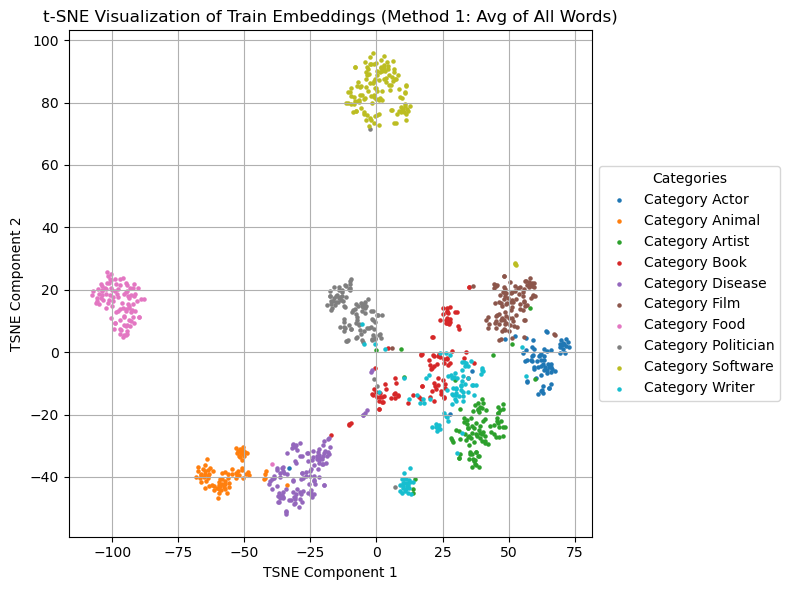

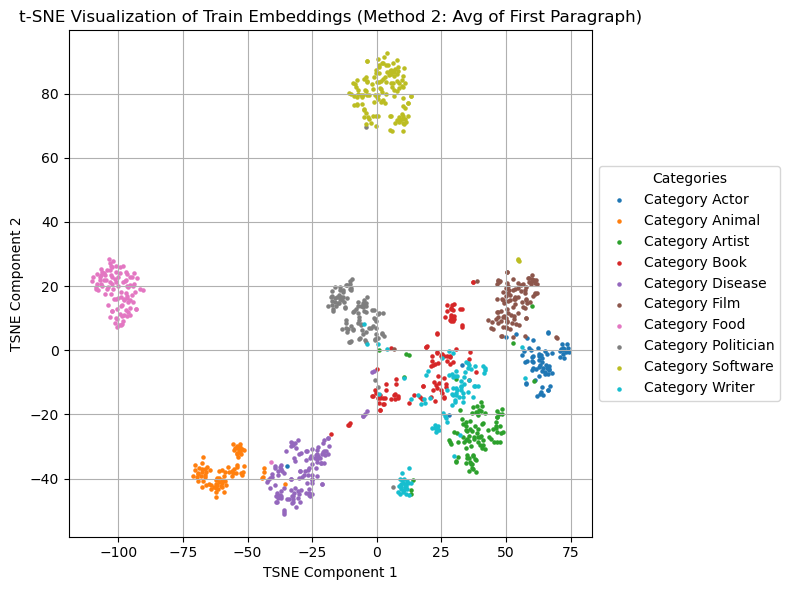

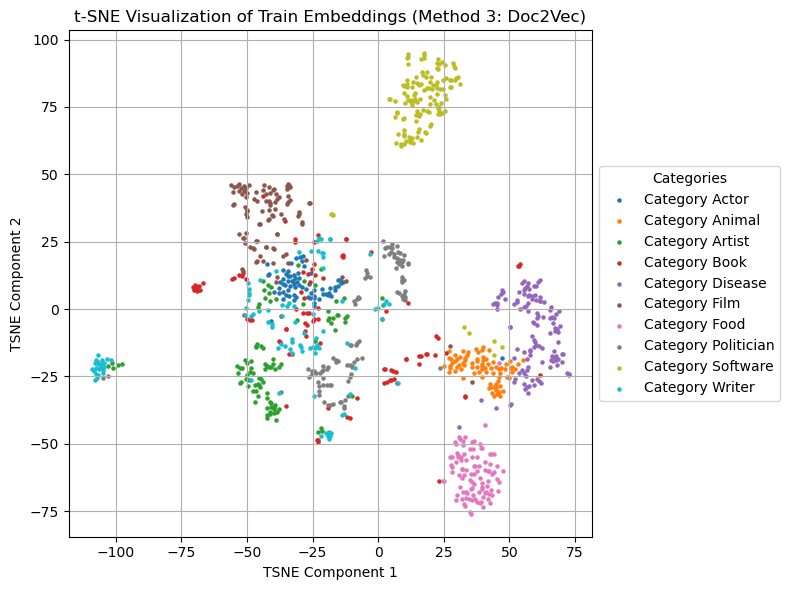

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne(embeddings, labels, pp, title):
    embeddings = np.array(embeddings)

    tsne = TSNE(n_components=2, random_state=16, perplexity=pp, n_iter=10000)
    embeddings_2d = tsne.fit_transform(embeddings)
    labels = np.array(labels)
    unique_labels = np.unique(labels)

    plt.figure(figsize=(8, 6))
    for label in unique_labels:
        idxs = labels == label
        plt.scatter(embeddings_2d[idxs, 0], embeddings_2d[idxs, 1], label=f'Category {label}', s=5)

    plt.title(title)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.legend(markerscale=3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Categories')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_tsne(train_embeddings_01, train_labels, 20, "t-SNE Visualization of Train Embeddings (Method 1: Avg of All Words)")
plot_tsne(train_embeddings_02, train_labels, 20, "t-SNE Visualization of Train Embeddings (Method 2: Avg of First Paragraph)")
plot_tsne(train_embeddings_03, train_labels, 15, "t-SNE Visualization of Train Embeddings (Method 3: Doc2Vec)")